In [92]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [37]:
marriage_df = pd.read_csv("marriage-rate-per-1000-inhabitants.csv")
marriage_df.head()

,Entity,Code,Year,"Crude marriage rate (per 1,000 inhabitants)"
0,Albania,ALB,1960,7.8
1,Albania,ALB,1961,11.3
2,Albania,ALB,1962,7.5
3,Albania,ALB,1963,7.5
4,Albania,ALB,1964,7.2


In [38]:
birth_rate_df = pd.read_csv("Crude_Birth_Rate.csv")
birth_rate_df

,DATE,SPDYNCBRTINUSA
0,1960-01-01,23.7
1,1961-01-01,23.3
2,1962-01-01,22.4
3,1963-01-01,21.7
4,1964-01-01,21.1
...,...,...
57,2017-01-01,11.8
58,2018-01-01,11.6
59,2019-01-01,11.4
60,2020-01-01,10.9


In [39]:
GDP_df = pd.read_csv("GDPCSV.csv")
GDP_df.head()

C:\Users\Mikey\AppData\Local\Temp\ipykernel_22840\1934052058.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  GDP_df = pd.read_csv("GDPCSV.csv")


,SOURCE,Source,BRANCH,Branch,TYPEXP,Type of Expenditure,TYPROG,Type of Programme,UNIT,Measure,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,10,Public,1,Old age,0,Total,0,Total,NCUR,"At current prices in national currency, in mil...",...,1980,AUD,Australian Dollar,6,Millions,NaN,NaN,4722.783,NaN,NaN
1,10,Public,1,Old age,0,Total,0,Total,NCUR,"At current prices in national currency, in mil...",...,1990,AUD,Australian Dollar,6,Millions,NaN,NaN,13992.788,NaN,NaN
2,10,Public,1,Old age,0,Total,0,Total,NCUR,"At current prices in national currency, in mil...",...,2000,AUD,Australian Dollar,6,Millions,NaN,NaN,39858.485,NaN,NaN
3,10,Public,1,Old age,0,Total,0,Total,NCUR,"At current prices in national currency, in mil...",...,2005,AUD,Australian Dollar,6,Millions,NaN,NaN,46930.541,NaN,NaN
4,10,Public,1,Old age,0,Total,0,Total,NCUR,"At current prices in national currency, in mil...",...,2010,AUD,Australian Dollar,6,Millions,NaN,NaN,60654.944,NaN,NaN


In [40]:
GDP_df.dtypes

SOURCE                    object
Source                    object
BRANCH                     int64
Branch                    object
TYPEXP                     int64
Type of Expenditure       object
TYPROG                     int64
Type of Programme         object
UNIT                      object
Measure                   object
COUNTRY                   object
Country                   object
YEAR                       int64
Year                       int64
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes                object
Flags                     object
dtype: object

In [41]:
New_gdp_df = GDP_df[
                ["Source", "Branch", "Type of Expenditure", "Type of Programme", "Measure", "Country",
                "Year", "Unit Code", "Unit", "PowerCode Code", "PowerCode", "Value"]]
New_gdp_df


,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,1980,AUD,Australian Dollar,6,Millions,4722.783
1,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,1990,AUD,Australian Dollar,6,Millions,13992.788
2,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,2000,AUD,Australian Dollar,6,Millions,39858.485
3,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,2005,AUD,Australian Dollar,6,Millions,46930.541
4,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,2010,AUD,Australian Dollar,6,Millions,60654.944
...,...,...,...,...,...,...,...,...,...,...,...,...
313710,Net Public,Total,Total,Total,In percentage of Gross Domestic Product,Lithuania,2019,PC,Percentage,0,Units,15.078
313711,Net Public,Total,Total,Total,In percentage of Gross Domestic Product,Costa Rica,2019,PC,Percentage,0,Units,11.729
313712,Net Total,Total,Total,Total,In percentage of Gross Domestic Product,Colombia,2019,PC,Percentage,0,Units,15.724
313713,Net Total,Total,Total,Total,In percentage of Gross Domestic Product,Costa Rica,2019,PC,Percentage,0,Units,12.537


In [42]:
country_gdp_index = New_gdp_df.set_index(New_gdp_df["Country"])
country_gdp_index

,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Country,,,,,,,,,,,,
Australia,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,1980,AUD,Australian Dollar,6,Millions,4722.783
Australia,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,1990,AUD,Australian Dollar,6,Millions,13992.788
Australia,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,2000,AUD,Australian Dollar,6,Millions,39858.485
Australia,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,2005,AUD,Australian Dollar,6,Millions,46930.541
Australia,Public,Old age,Total,Total,"At current prices in national currency, in mil...",Australia,2010,AUD,Australian Dollar,6,Millions,60654.944
...,...,...,...,...,...,...,...,...,...,...,...,...
Lithuania,Net Public,Total,Total,Total,In percentage of Gross Domestic Product,Lithuania,2019,PC,Percentage,0,Units,15.078
Costa Rica,Net Public,Total,Total,Total,In percentage of Gross Domestic Product,Costa Rica,2019,PC,Percentage,0,Units,11.729
Colombia,Net Total,Total,Total,Total,In percentage of Gross Domestic Product,Colombia,2019,PC,Percentage,0,Units,15.724


In [43]:
country_gdp_index["Source"].describe()

count     313715
unique         7
top       Public
freq      103933
Name: Source, dtype: object

In [44]:
country_gdp_index["Source"].unique()

array(['Public', 'Mandatory private', 'Voluntary private',
       'Public and mandatory private', 'Net Public', 'Net Total',
       'Private (Mandatory and Voluntary)'], dtype=object)

In [45]:
country_gdp_index["Branch"].unique()

array(['Old age', 'Survivors', 'Incapacity related', 'Health', 'Family',
       'Active labour market programmes', 'Unemployment', 'Housing',
       'Other social policy areas', 'Total'], dtype=object)

In [46]:
country_gdp_index["Type of Expenditure"].unique()

array(['Total', 'Cash benefits', 'Benefits in kind'], dtype=object)

In [47]:
country_gdp_index["Type of Programme"].unique()

array(['Total', 'Old age - Pension', 'Old age - Early retirement pension',
       'Old age - Other cash benefits',
       'Old age - Residential care / Home-help services',
       'Old age - Other benefits in kind', 'Survivors - Pension',
       'Survivors - Other cash benefits', 'Survivors - Funeral expenses',
       'Survivors - Other benefits in kind',
       'Incapacity related - Disability pensions',
       'Incapacity related - Pensions (occupational injury and disease)',
       'Incapacity related - Paid sick leave (occupational injury and disease)',
       'Incapacity related - Paid sick leave (other sickness daily allowances)',
       'Incapacity related - Other cash benefits',
       'Incapacity related - Residential care / Home-help services',
       'Incapacity related - Rehabilitation services',
       'Incapacity related - Other benefits in kind',
       'Family - Family allowances',
       'Family - Maternity and parental leave',
       'Family - Other cash benefits',
  

In [48]:
country_gdp_index["Measure"].unique()

array(['At current prices in national currency, in millions',
       'At constant prices (2015) in national currency, in millions',
       'Per head, at current prices and current PPPs, in US dollars',
       'In percentage of Gross Domestic Product',
       'In percentage of Total General Government Expenditure',
       'Per head, at constant prices (2015) and constant PPPs (2015), in US dollars'],
      dtype=object)

In [49]:
usa_family_allowance = country_gdp_index.loc[(country_gdp_index["Country"] == "United States") & (country_gdp_index["Year"].between(1970, 2024) & (country_gdp_index["Type of Programme"] == 'Family - Family allowances'))]
usa_family_allowance.head(-5)

,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Country,,,,,,,,,,,,
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,12588.483
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1990,USD,US Dollar,6,Millions,12515.527
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2000,USD,US Dollar,6,Millions,13968.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2005,USD,US Dollar,6,Millions,15226.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2010,USD,US Dollar,6,Millions,14935.000
...,...,...,...,...,...,...,...,...,...,...,...,...
United States,Mandatory private,Family,Cash benefits,Family - Family allowances,"Per head, at constant prices (2015) and consta...",United States,2019,USD,US Dollar,0,Units,NaN
United States,Mandatory private,Family,Cash benefits,Family - Family allowances,"Per head, at constant prices (2015) and consta...",United States,2020,USD,US Dollar,0,Units,NaN
United States,Public and mandatory private,Family,Cash benefits,Family - Family allowances,"Per head, at constant prices (2015) and consta...",United States,1980,USD,US Dollar,0,Units,140.289


In [50]:
usa_family_allowance.dropna()

,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Country,,,,,,,,,,,,
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,12588.483
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1990,USD,US Dollar,6,Millions,12515.527
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2000,USD,US Dollar,6,Millions,13968.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2005,USD,US Dollar,6,Millions,15226.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2010,USD,US Dollar,6,Millions,14935.000
...,...,...,...,...,...,...,...,...,...,...,...,...
United States,Public and mandatory private,Family,Cash benefits,Family - Family allowances,"Per head, at constant prices (2015) and consta...",United States,2005,USD,US Dollar,0,Units,62.159
United States,Public and mandatory private,Family,Cash benefits,Family - Family allowances,"Per head, at constant prices (2015) and consta...",United States,2010,USD,US Dollar,0,Units,52.751
United States,Public and mandatory private,Family,Cash benefits,Family - Family allowances,"Per head, at constant prices (2015) and consta...",United States,2015,USD,US Dollar,0,Units,43.098


In [51]:
usa_family_allowance["PowerCode"].unique()

array(['Millions', 'Units'], dtype=object)

NameError: name 'usa_family_unit' is not defined

In [53]:
usa_family_unit = usa_family_allowance.loc[usa_family_allowance["PowerCode"] == 'Units']
usa_family_mill = usa_family_allowance.loc[usa_family_allowance["PowerCode"] == 'Millions']
usa_family_mill.dropna()

,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Country,,,,,,,,,,,,
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,12588.483
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1990,USD,US Dollar,6,Millions,12515.527
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2000,USD,US Dollar,6,Millions,13968.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2005,USD,US Dollar,6,Millions,15226.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2010,USD,US Dollar,6,Millions,14935.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2015,USD,US Dollar,6,Millions,13772.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2019,USD,US Dollar,6,Millions,12153.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2020,USD,US Dollar,6,Millions,13320.000
United States,Public and mandatory private,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,12588.483


In [54]:
public_usa_mill = usa_family_mill.loc[usa_family_mill["Source"] == "Public"]
public_usa_mill

,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Country,,,,,,,,,,,,
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,12588.483
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1990,USD,US Dollar,6,Millions,12515.527
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2000,USD,US Dollar,6,Millions,13968.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2005,USD,US Dollar,6,Millions,15226.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2010,USD,US Dollar,6,Millions,14935.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2015,USD,US Dollar,6,Millions,13772.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2019,USD,US Dollar,6,Millions,12153.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2020,USD,US Dollar,6,Millions,13320.000
United States,Public,Family,Cash benefits,Family - Family allowances,At constant prices (2015) in national currency...,United States,1980,USD,US Dollar,6,Millions,31855.651


In [55]:
family_usa = public_usa_mill.loc[public_usa_mill["Measure"] == "At current prices in national currency, in millions"]
family_usa

,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Country,,,,,,,,,,,,
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,12588.483
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1990,USD,US Dollar,6,Millions,12515.527
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2000,USD,US Dollar,6,Millions,13968.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2005,USD,US Dollar,6,Millions,15226.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2010,USD,US Dollar,6,Millions,14935.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2015,USD,US Dollar,6,Millions,13772.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2019,USD,US Dollar,6,Millions,12153.000
United States,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2020,USD,US Dollar,6,Millions,13320.000


In [56]:
family_usa.set_index(family_usa["Year"])


,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Year,,,,,,,,,,,,
1980,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,12588.483
1990,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,1990,USD,US Dollar,6,Millions,12515.527
2000,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2000,USD,US Dollar,6,Millions,13968.000
2005,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2005,USD,US Dollar,6,Millions,15226.000
2010,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2010,USD,US Dollar,6,Millions,14935.000
2015,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2015,USD,US Dollar,6,Millions,13772.000
2019,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2019,USD,US Dollar,6,Millions,12153.000
2020,Public,Family,Cash benefits,Family - Family allowances,"At current prices in national currency, in mil...",United States,2020,USD,US Dollar,6,Millions,13320.000


In [57]:
usa_family_maternity = country_gdp_index.loc[(country_gdp_index["Country"] == "United States") & (country_gdp_index["Year"].between(1970, 2024) & (country_gdp_index["Type of Programme"] == 'Family - Maternity and parental leave'))]
usa_family_maternity

,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Country,,,,,,,,,,,,
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,1990,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2000,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2005,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2010,USD,US Dollar,6,Millions,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
United States,Mandatory private,Family,Cash benefits,Family - Maternity and parental leave,"Per head, at constant prices (2015) and consta...",United States,2005,USD,US Dollar,0,Units,NaN
United States,Mandatory private,Family,Cash benefits,Family - Maternity and parental leave,"Per head, at constant prices (2015) and consta...",United States,2010,USD,US Dollar,0,Units,NaN
United States,Mandatory private,Family,Cash benefits,Family - Maternity and parental leave,"Per head, at constant prices (2015) and consta...",United States,2015,USD,US Dollar,0,Units,NaN


In [58]:
usa_maternity_millions = usa_family_maternity.loc[(usa_family_maternity["PowerCode"] == "Millions") & (usa_family_maternity["Measure"] == "At current prices in national currency, in millions")]
usa_maternity_millions

,Source,Branch,Type of Expenditure,Type of Programme,Measure,Country,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
Country,,,,,,,,,,,,
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,1990,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2000,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2005,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2010,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2015,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2019,USD,US Dollar,6,Millions,NaN
United States,Public,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,2020,USD,US Dollar,6,Millions,NaN
United States,Mandatory private,Family,Cash benefits,Family - Maternity and parental leave,"At current prices in national currency, in mil...",United States,1980,USD,US Dollar,6,Millions,NaN


In [59]:
combined_df = pd.concat([family_usa, usa_maternity_millions], axis=0, ignore_index=True)

In [60]:
combined_df["Year"] = pd.to_datetime(combined_df["Year"], format='%Y')


In [61]:
combined_df.reset_index(drop=True, inplace=True)


In [62]:
combined_df.dtypes

Source                         object
Branch                         object
Type of Expenditure            object
Type of Programme              object
Measure                        object
Country                        object
Year                   datetime64[ns]
Unit Code                      object
Unit                           object
PowerCode Code                  int64
PowerCode                      object
Value                         float64
dtype: object

,Entity,Code,Year,"Crude marriage rate (per 1,000 inhabitants)"
0,Albania,ALB,1960,7.8
1,Albania,ALB,1961,11.3
2,Albania,ALB,1962,7.5
3,Albania,ALB,1963,7.5
4,Albania,ALB,1964,7.2
...,...,...,...,...
3246,Vietnam,VNM,2002,11.8
3247,Wallis and Futuna,WLF,1970,6.3
3248,Western Sahara,ESH,1970,6.6
3249,Yemen,YEM,2001,0.5


In [77]:
usa_marriage = marriage_df.loc[marriage_df["Entity"] == "United States"].copy()
usa_marriage["Crude marriage rate (per 1,000 inhabitants)"] *= 1000
usa_marriage.round(1)

,Entity,Code,Year,"Crude marriage rate (per 1,000 inhabitants)"
3127,United States,USA,1920,12000.0
3128,United States,USA,1921,10700.0
3129,United States,USA,1922,10300.0
3130,United States,USA,1923,11000.0
3131,United States,USA,1924,10400.0
...,...,...,...,...
3221,United States,USA,2014,6900.0
3222,United States,USA,2015,6900.0
3223,United States,USA,2016,7000.0
3224,United States,USA,2017,6900.0


Text(0.5, 1.0, 'Crude Marriage Rate')

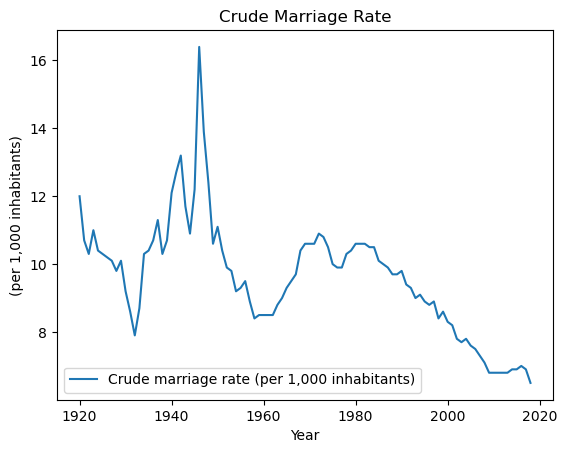

In [65]:
usa_marriage.plot(x="Year", y="Crude marriage rate (per 1,000 inhabitants)")
plt.ylabel("(per 1,000 inhabitants)")
plt.xlabel("Year")
plt.title("Crude Marriage Rate")

In [86]:
usa_marriage["Year"] = pd.to_datetime(usa_marriage["Year"], format='%Y')


In [108]:
birth_rate_df["DATE"] = pd.to_datetime(birth_rate_df["DATE"], format='%Y')
birth_rate_df["SPDYNCBRTINUSA"] *= 1000
birth_rate_df


,DATE,SPDYNCBRTINUSA
0,1960-01-01,23700.0
1,1961-01-01,23300.0
2,1962-01-01,22400.0
3,1963-01-01,21700.0
4,1964-01-01,21100.0
...,...,...
57,2017-01-01,11800.0
58,2018-01-01,11600.0
59,2019-01-01,11400.0
60,2020-01-01,10900.0


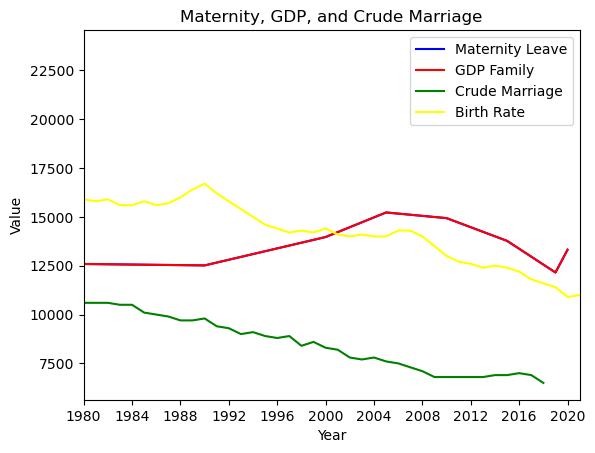

In [109]:
plt.plot(combined_df['Year'], combined_df['Value'], label='Maternity Leave', color='blue')
plt.plot(combined_df['Year'], combined_df['Value'], label='GDP Family', color='red')

# Assuming usa_marriage DataFrame contains the marriage data
# If not, replace it with the correct DataFrame
plt.plot(usa_marriage["Year"], usa_marriage["Crude marriage rate (per 1,000 inhabitants)"], label='Crude Marriage', color='green')
plt.plot(birth_rate_df["DATE"], birth_rate_df["SPDYNCBRTINUSA"], label='Birth Rate', color='yellow')
# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Maternity, GDP, and Crude Marriage')
plt.legend()
plt.xlim(datetime.datetime(1980, 1, 1), datetime.datetime(2020, 12, 31))
# Show the plot
plt.show()
